### Fraud Detection Dataset

##### Problem definition
A payment transaction dataset is provided. The task is to create an supervised machine learning to predict wether the transic were fraud.



##### Data Exploration
Prepare the dataset for machine learning
Create an unsupervised machine learning model
Measure the accurancy of the model

#### About Dataset
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model

##### Methodology
General Overview: Have a General Overview of the data
EDA: Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
Data Preprocessing: With the information gained after performing EDA, Preprocess the Data accordingly
Model Building: Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
Model Performance: Assess the Performance of the Model on the Testing data set
Predictions: Make Predictions on the Testing data set

#### Data Understanding
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
amount - amount of the transaction in local currency.
nameOrig - customer who started the transaction
oldbalanceOrg - initial balance before the transaction
newbalanceOrig - new balance after the transaction
nameDest - customer who is the recipient of the transaction
oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers
that start with M (Merchants).
newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that 
start with M (Merchants).
isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the 
fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the 
funds by transferring to another account and then cashing out of the system.
isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts.
An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

In [2]:
# Install and import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
import logging
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import plotly.express as px

###### 2. Data Understanding
2.1 Read data with pandas

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Desktop\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###### Explore Dataset information


In [4]:
# check dataset info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
# check dataset shape
df.shape

(1048575, 11)

#### 1.  Data Cleaning

In [6]:
# check missing value of the data
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Dataset doesn't contain any null or missing values 

In [7]:
# describe numeric column
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


##### Checking count of Fraud and Non-Fraud Transactions

In [9]:
df['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [10]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [12]:
df.duplicated().sum()

0

There are no duplicate values in the data

In [20]:
# Features with numerical value
features = ['Transaction_Amt','Sender_Bal_b4', 'Transaction_Hours','Sender_Bal_After','Receiver_Bal_b4','Receiver_Bal_After']

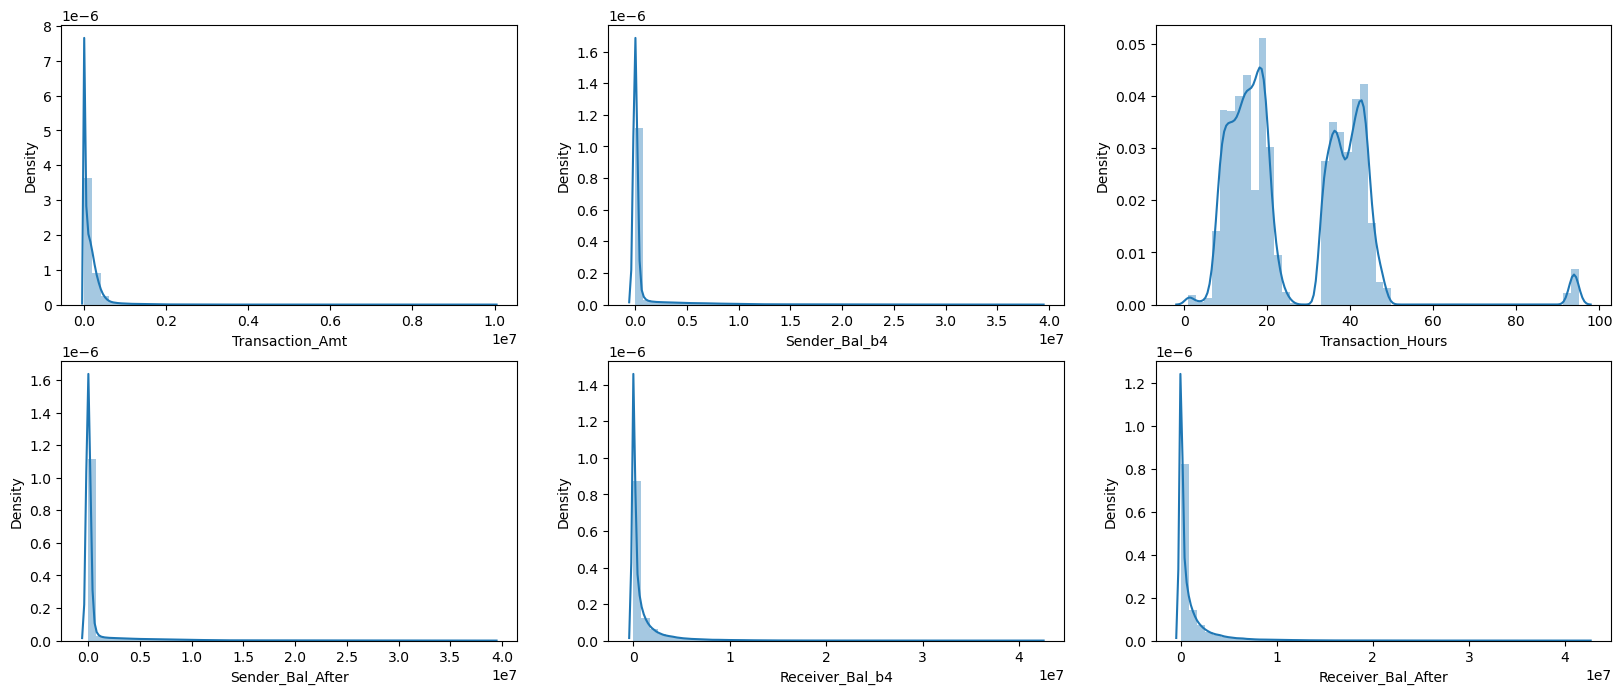

In [21]:
# Plotting all numerical features for distrubution check
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(df[feature])
plt.show()

#### Checking Of the Outliers

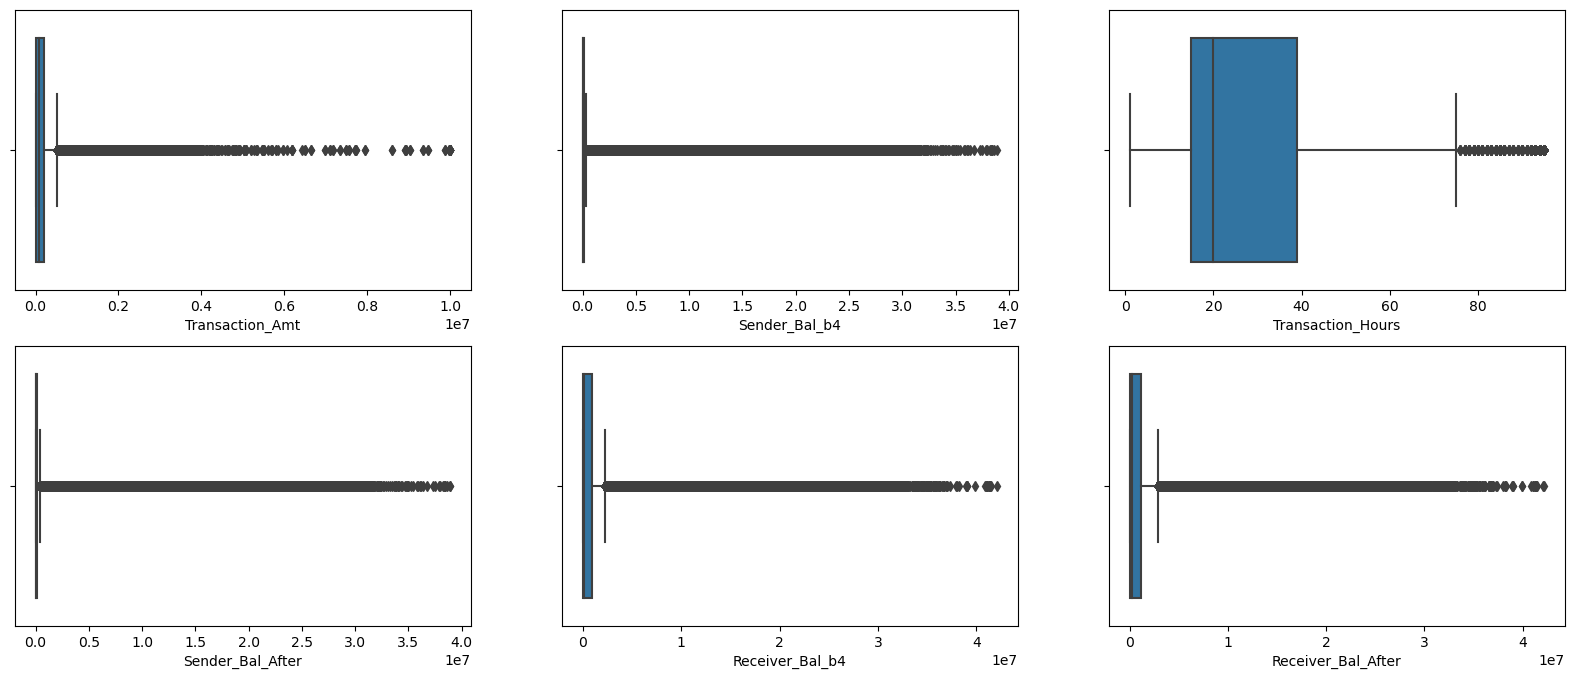

In [23]:
# Plotting boxplot to find the outliers
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.boxplot(df[feature])
plt.show()


Boxplot shows the 0th, 25th, 75th, 100th percentile of the distributed data and the presence of outlier. In our dataset all features has outliers which has to be removed using Inter-Quartile Range (IQR) proximity rule or Percentile-based approach in calculating upper and lower limit of the distribution. Values beyond these limits are considered as Outliers.

#### Handling Outliers

In [24]:
# Removing outliers using Inter-Quartile Range (IQR) proximity rule  

for feature in features:
  percentile25 = df[feature].quantile(0.25)
  percentile75 = df[feature].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].shape
  df = df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]
  print(f'\nRemoving outliers from {feature} \n   Outliers : {outliers}\n   Remaining samples :', df.shape)


Removing outliers from Transaction_Amt 
   Outliers : (53088, 11)
   Remaining samples : (995487, 11)

Removing outliers from Sender_Bal_b4 
   Outliers : (172805, 11)
   Remaining samples : (822681, 11)

Removing outliers from Transaction_Hours 
   Outliers : (14634, 11)
   Remaining samples : (808047, 11)

Removing outliers from Sender_Bal_After 
   Outliers : (147229, 11)
   Remaining samples : (660818, 11)

Removing outliers from Receiver_Bal_b4 
   Outliers : (84567, 11)
   Remaining samples : (576251, 11)

Removing outliers from Receiver_Bal_After 
   Outliers : (38184, 11)
   Remaining samples : (538067, 11)


After removing outliers the samples reduced from 1048575 to 538067. Nearly 50% outlier samples are removed using IQR rule.

In [25]:
# Correlation between features and target 
df.corr()


,Transaction_Hours,Transaction_Amt,Sender_Bal_b4,Sender_Bal_After,Receiver_Bal_b4,Receiver_Bal_After,isFraud,isFlaggedFraud
Transaction_Hours,1.000000,-0.004783,-0.002188,0.004458,0.030589,0.016512,0.019985,NaN
Transaction_Amt,-0.004783,1.000000,0.202019,-0.239507,0.383253,0.624405,0.007565,NaN
Sender_Bal_b4,-0.002188,0.202019,1.000000,0.448618,-0.035695,0.036632,0.070921,NaN
Sender_Bal_After,0.004458,-0.239507,0.448618,1.000000,-0.138145,-0.195015,-0.012166,NaN
Receiver_Bal_b4,0.030589,0.383253,-0.035695,-0.138145,1.000000,0.907646,-0.007752,NaN
Receiver_Bal_After,0.016512,0.624405,0.036632,-0.195015,0.907646,1.000000,-0.007951,NaN
isFraud,0.019985,0.007565,0.070921,-0.012166,-0.007752,-0.007951,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


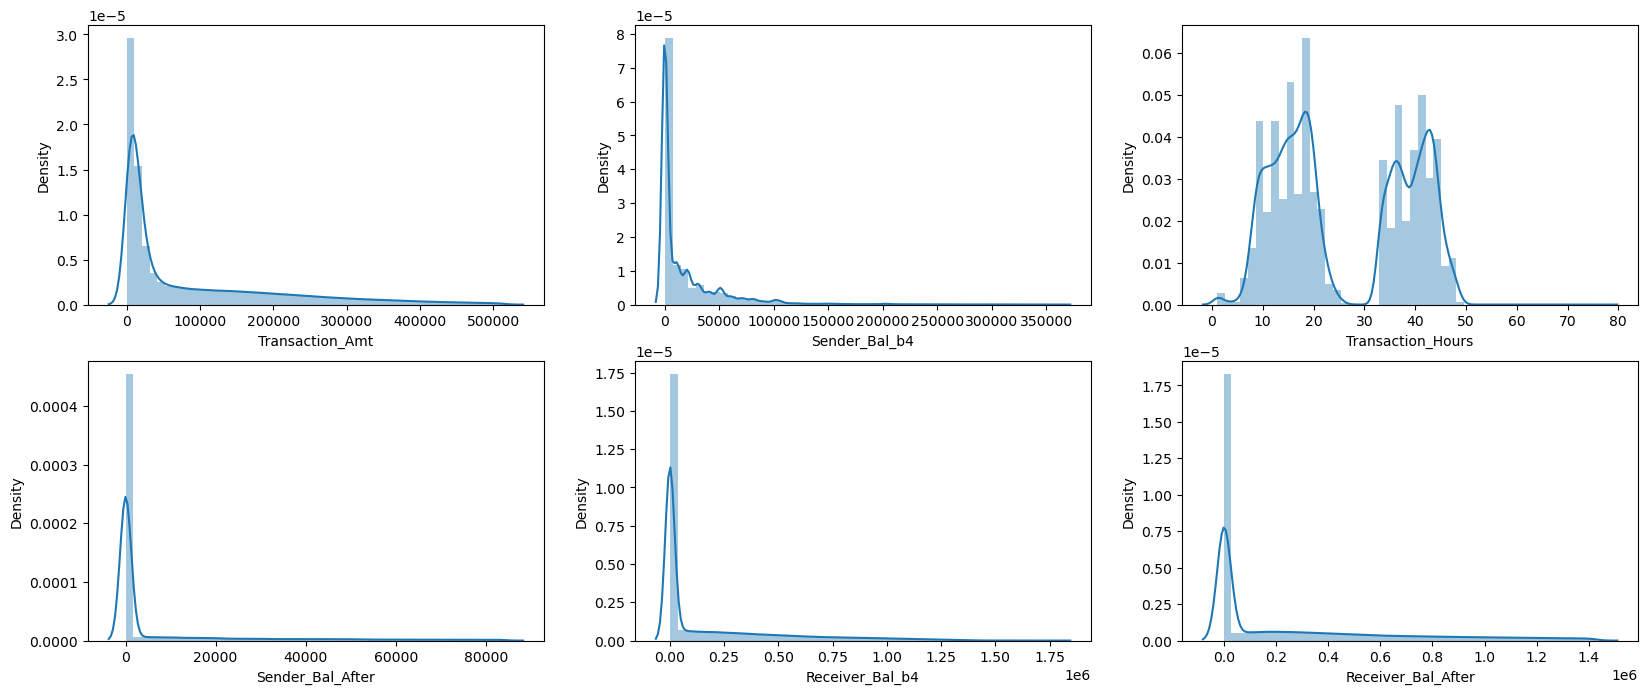

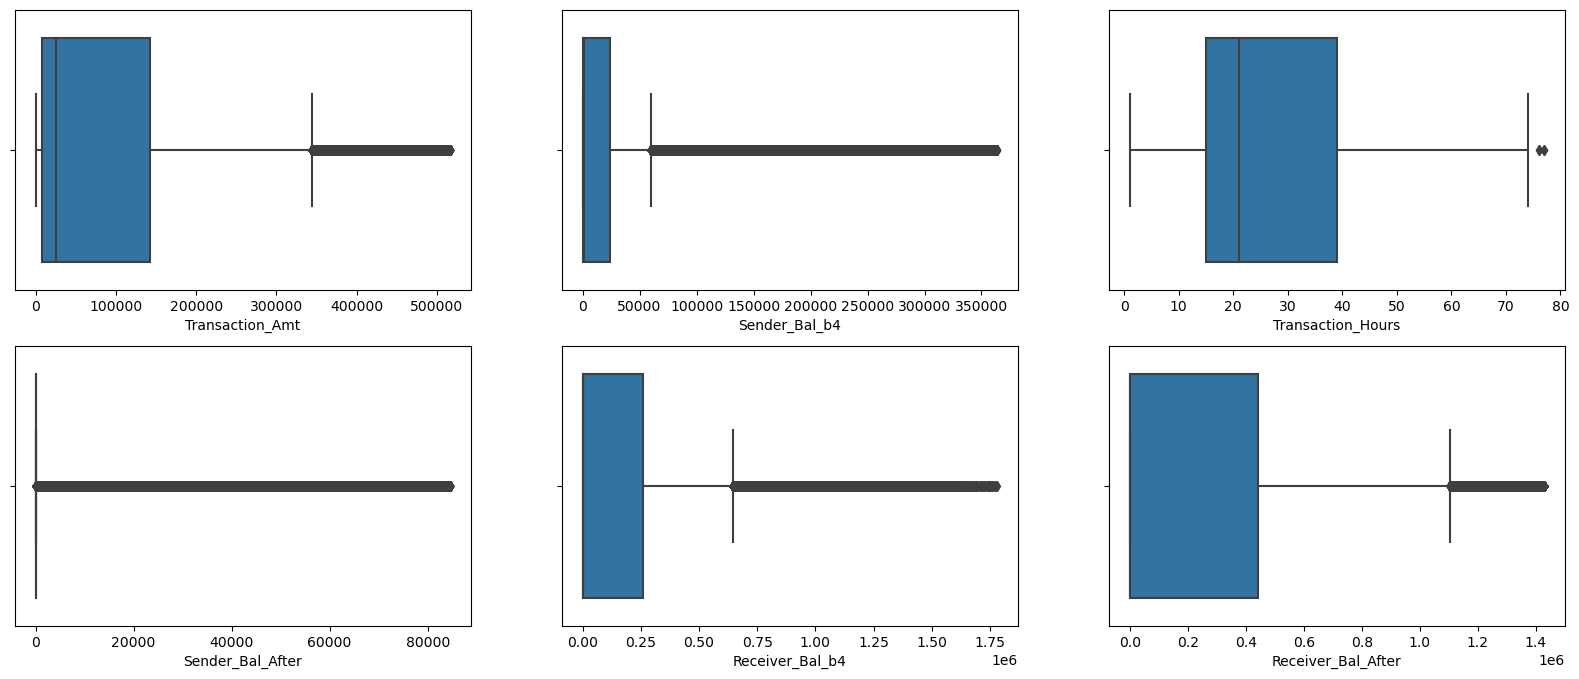

In [26]:
# Plotting after removing outliers

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.distplot(df[feature])
plt.show()

plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
  plt.subplot(2,3,features.index(feature)+1)
  sns.boxplot(df[feature])
plt.show()

#### Exploratory Data Analysis

In [99]:
df = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Desktop\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [42]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [43]:
import plotly.express as px

In [45]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [46]:
type=df['type'].value_counts()

In [47]:
transaction=type.index
quentity=type.values

##### Proportion of type of Transactions

In [48]:
px.pie(df,values=quentity,names=transaction,hole=0.5,title="distribution of transaction type")

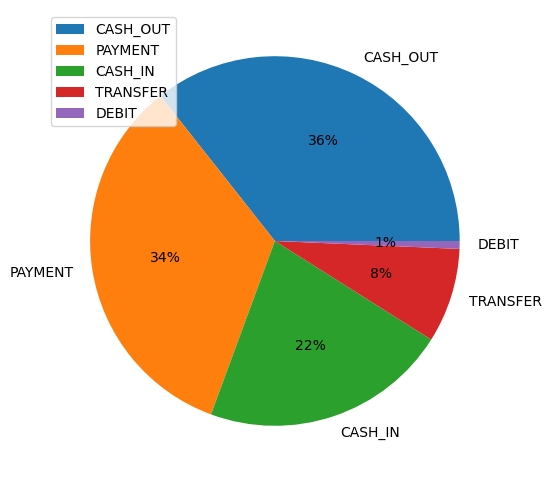

In [51]:
type = df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(6,6))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

##### Count of Fraud and Non-Fraud Transactions in each type of Transaction

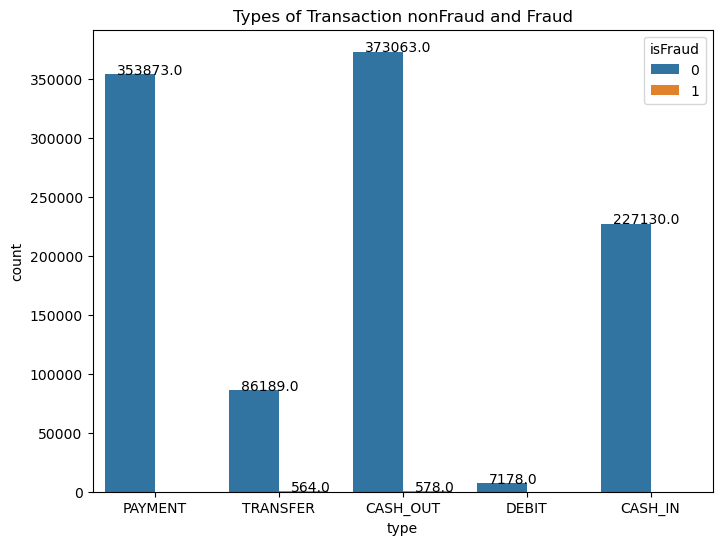

In [55]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


Transaction types TRANSFER and CASH_OUT only have FRAUD Transactions.
DEBIT Transactions are only few and TRANSFER type Transactions are also less compared to other type of transactions.
No of Fraud transactions of TRANSFER type are very close to No of CASH_OUT FRAUD transactions. Probably modus operadi of FRAUD transactions is by transferring funds to a specific account and then CASHING OUT from those accounts. We will check this further.

In [56]:
data1=df[(df['isFraud']==1) & (df['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C1105243161    1
C29406343      1
C548676992     1
C506992553     1
              ..
C1466511502    1
C2145664965    1
C866867675     1
C399994587     1
C757947873     1
Name: nameDest, Length: 564, dtype: int64

In [57]:
data2=df[(df['isFraud']==1) & (df['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

C840083671     1
C32861099      1
C1032527042    1
C1336358470    1
C1563094045    1
              ..
C1257352420    1
C1657291163    1
C1455982049    1
C1845753498    1
C409531429     1
Name: nameOrig, Length: 578, dtype: int64

There are no specific accounts from which fraud transactions are carried out . Hence we disregard our suspicioun. So these account name features are not useful for us in modelling as is.

##### Let's check further

In [61]:
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [62]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

For fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.

We derive a new feature Transaction Type2 from these features account types "C" (customer) and "M" (merchant), which would be the first character for each value under nameOrig and nameDest.

We will create a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [103]:
# adding feature type1
df_new = df.copy() # creating copy of dataset in case I need original dataset
df_new["Type2"] = np.nan # initializing feature column

# filling feature column
df_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'),"Type2"] = "CC" 
df_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'),"Type2"] = "CM"
df_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'),"Type2"] = "MC"
df_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'),"Type2"] = "MM"

###### Plotting Pairplot

###### Visualizing Numeric variables against Fraud using Boxplots

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

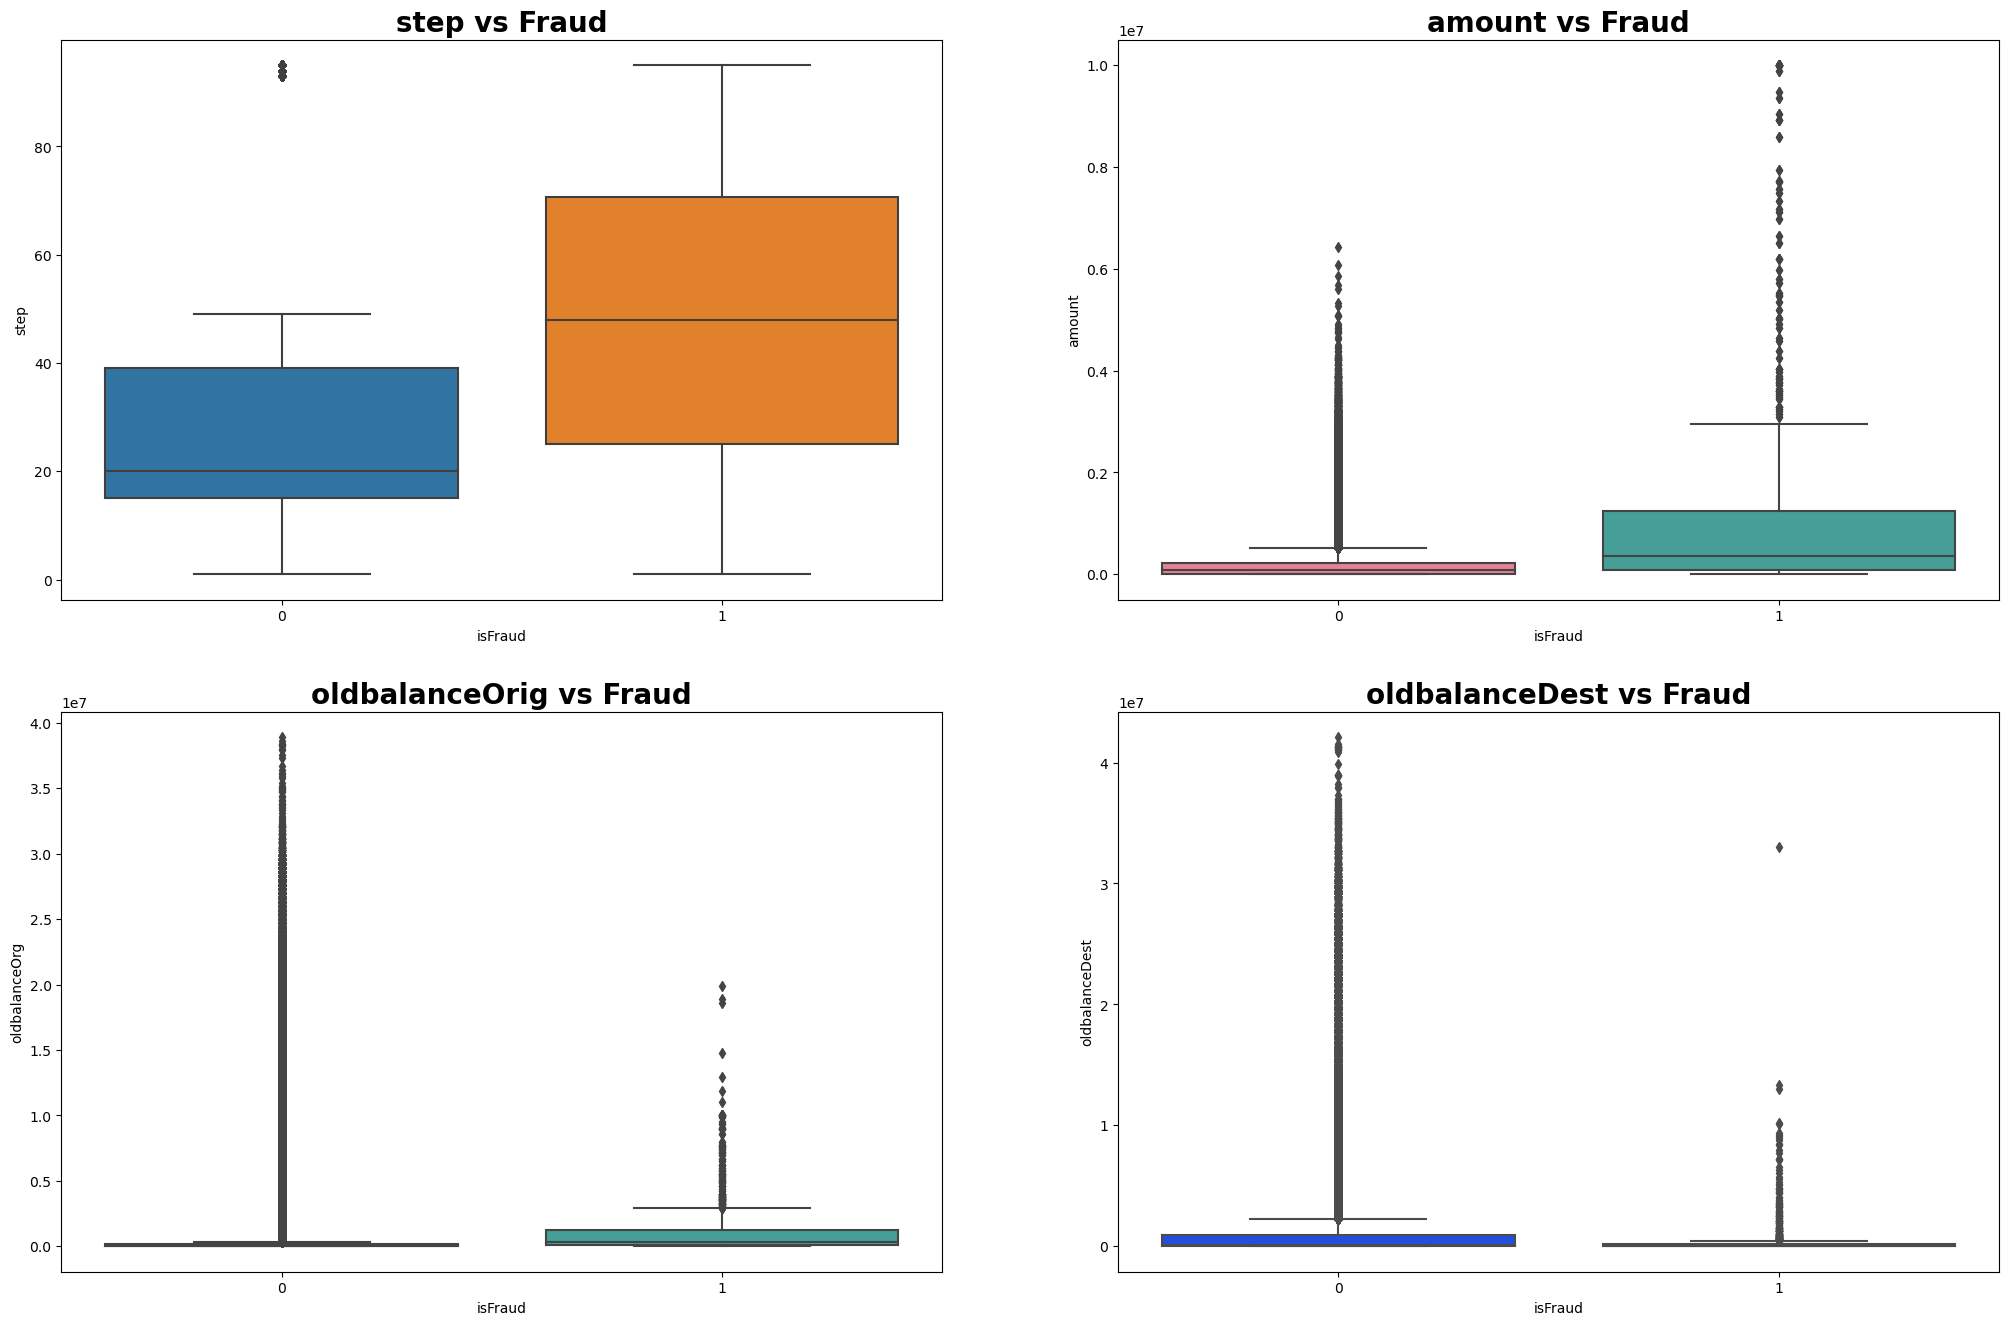

In [105]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = df_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = df_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

Median amount for fraud transactions is greater than Non Fraud transactions.
Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.

In [106]:
fraud = df_new[df_new["isFraud"] == 1]
valid = df_new[df_new["isFraud"] == 0]

In [108]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    1142
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    693560
CM    353873
Name: Type2, dtype: int64


From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer).

##### Looking balances before and after the transaction

In [109]:
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  84.0
Percentage of observations with balance errors in the account receiving money:  100.0


Most, if not all, of the observations have errors in calculating the balances before and after the transaction.

Since We don't know why these errors are caused, We cannot treat them.

We will not process them and use them as is for our modelling purpose.

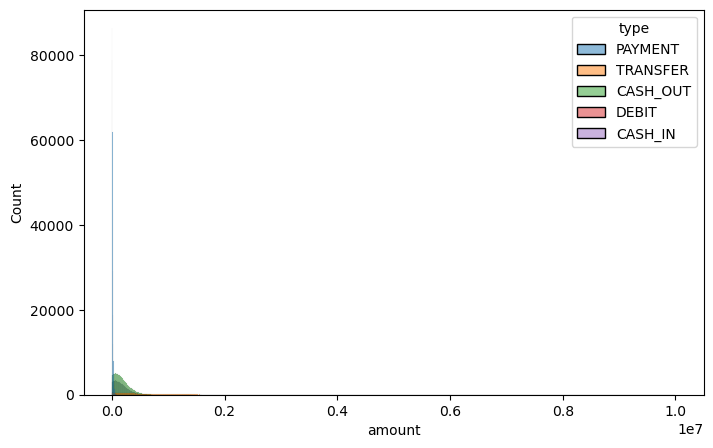

In [101]:
plt.figure(figsize=(8,5))
warnings.filterwarnings('ignore')
sns.histplot(df, x='amount', hue = 'type')

plt.show()

Most of the transactions are third party payments means money has been used to purchase or pay bills to the merchants like electricity, mobile recharge, onlin e shopping, online food delivery etc. Second most mode of usage is cash_out - withdrawing money from ATMs which is untraceable if there is no CCTV.

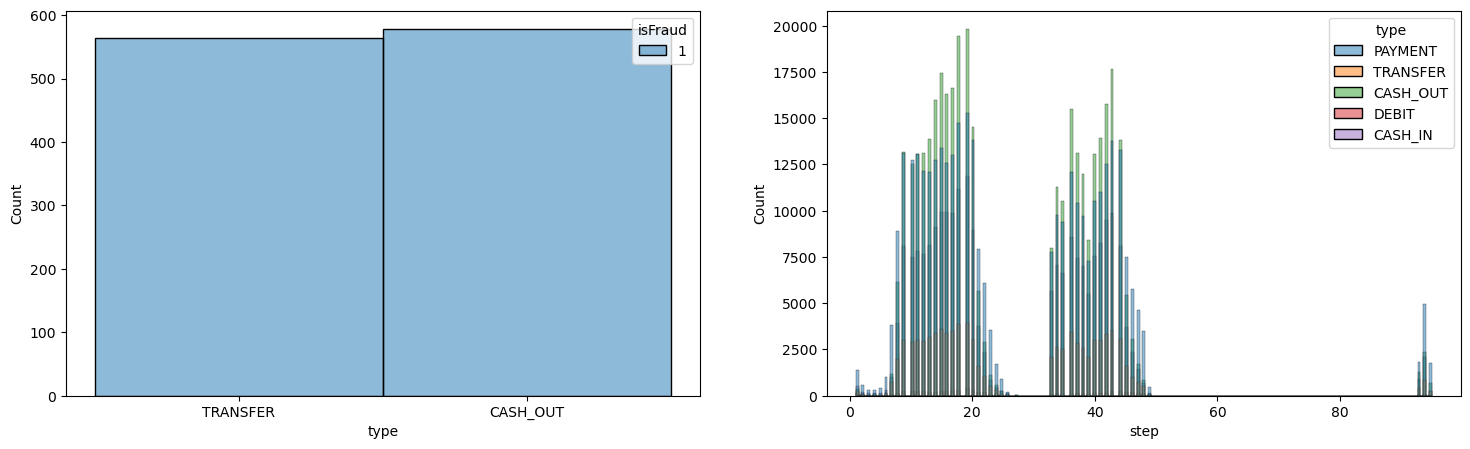

In [68]:
plt.figure(figsize=(18,5))
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.histplot(df[df.isFraud == 1], x="type", hue = 'isFraud')

plt.subplot(1,2,2)
sns.histplot(df, x = 'step', hue = 'type')
plt.show()


Most of the fraud transactions are transfer and cashout, means it can be untraceable when executed cleverly. Also the transaction time for cash_mode transactions are longer compared to transfer mode.

In [69]:
df2 = df.copy()

In [71]:
df2['Receiver_Status'] = df2['nameDest'].apply(lambda x : 'Unknown Receiver' if x[0] == 'M' else 'Known Receiver')

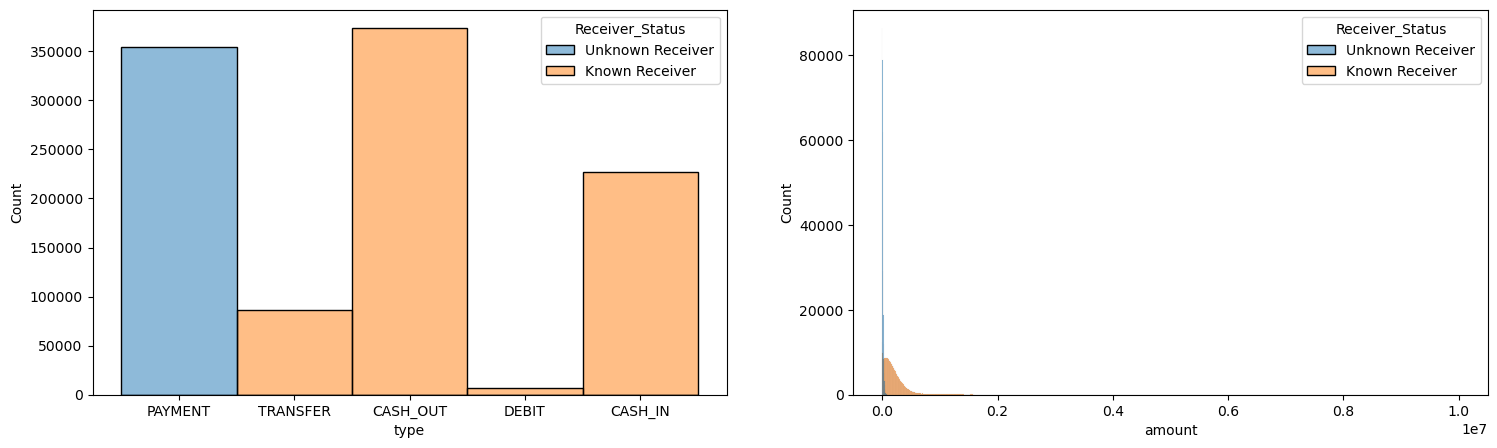

In [72]:
plt.figure(figsize=(18,5))
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.histplot(df2, x="type", hue = 'Receiver_Status')

plt.subplot(1,2,2)
sns.histplot(df2, x = 'amount', hue = 'Receiver_Status')

plt.show()


Payment mode of transfer are mostly to unknown sender and remaining all transactions are to known sender whose bank details are traceable.

Transactions to unknown sender are very high when compared to known which makes it difficult to predict the fraudulent transactions

###### Feature Engineering

Boxcox transformation is used to normalize the skewed distribution

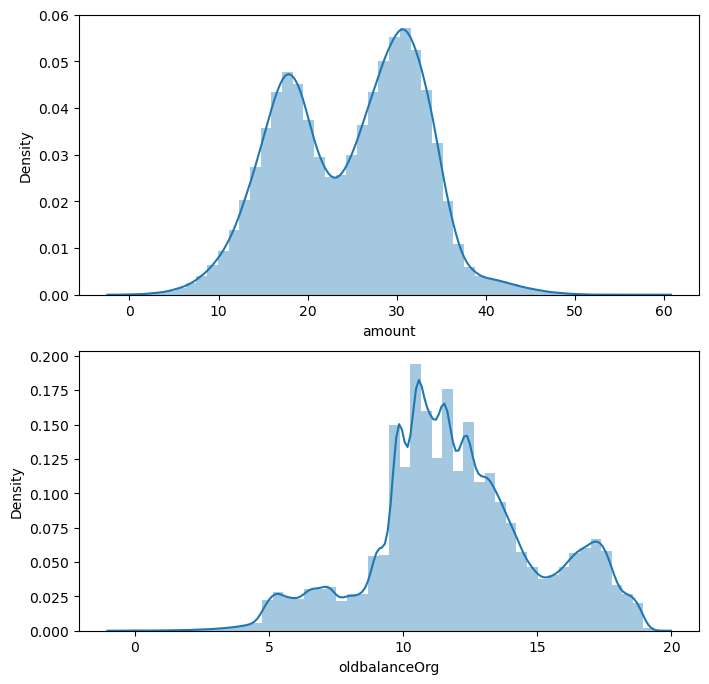

In [75]:
# Boxcox transformation 
df = df[(df['amount'] > 0)]
df = df[(df['oldbalanceOrg'] > 0)]
df.amount = boxcox(df.amount)[0]
df.oldbalanceOrg = boxcox(df.oldbalanceOrg)[0]
plt.figure(figsize = (8, 8))

# Plotting features after transformation
plt.subplot(2,1,1)
sns.distplot(df['amount'])
plt.subplot(2,1,2)
sns.distplot(df['oldbalanceOrg'])
plt.show()

Skewness in the distribution removed after transformation

##### Handling Multicollinearity issue

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables
Multicollinearity is a problem because it undermines the statistical significance of an independent variable

Remove highly correlated predictors from the model. If you have two or more factors with a high VIF, remove one from the model

Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components

In [76]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.041836,-0.038461,-0.008725,0.001069,-0.017004,0.055208,NaN
amount,-0.041836,1.000000,0.090402,0.125094,0.225811,0.274949,0.049261,NaN
oldbalanceOrg,-0.038461,0.090402,1.000000,0.628581,0.158471,0.123302,0.020078,NaN
newbalanceOrig,-0.008725,0.125094,0.628581,1.000000,0.154325,0.119510,-0.014365,NaN
oldbalanceDest,0.001069,0.225811,0.158471,0.154325,1.000000,0.974799,-0.007022,NaN
newbalanceDest,-0.017004,0.274949,0.123302,0.119510,0.974799,1.000000,0.002767,NaN
isFraud,0.055208,0.049261,0.020078,-0.014365,-0.007022,0.002767,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Feature Selection:
Step - This feature holds the unit of transaction time which is an important feature to predict the fraudulent transaction. Irregular time window can help us to detect the fraud.

Amount- Without amount details it is difficult to track transaction amoung big pile of transactions, amount helps to search and find the transaction entity.

oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest - They are all correlated to each other, Having any one feature is sufficient for model building.

isFlaggedFraud - This feature has extreme imbalanced values which will not help in prediction,
Hence we can remove it.

In [79]:
# Dropping features to remove multicollinearity issue
df.drop(columns = ['newbalanceOrig','oldbalanceDest','nameOrig','newbalanceDest','isFlaggedFraud','nameDest'], inplace = True)

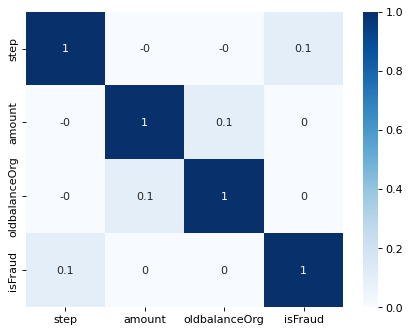

In [80]:
# Correlation after removing unecessary features
plt.figure(dpi=80)
sns.heatmap(np.round(df.corr(),1),annot=True, cmap="Blues")
plt.show()

As you can see the correlation among features and target are less than 0.2, all high correlated features are removed

##### Handling categorical data

In [81]:
# Converting categorical data into numerical form 
le = LabelEncoder()
df['Transaction_Type'] = le.fit_transform(df['type'])

In [82]:
df.drop(columns = ['type'], inplace = True)

###### Resampling Imbalanced dataset

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes

Having a balanced data set for a model would generate higher accuracy models, higher balanced accuracy and balanced detection rate. Hence, its important to have a balanced data set for a classification models

To handle the imbalanced data, Sampling techniques are used. There are two types of sampling techniques available: Undersampling and Oversampling. Undersampling selects same quantity of the instances from the majority class thus equally with minority class.

Since our dataset is huge we perform undersampling to avoid heavy computation issues. Be aware that undersampling might miss important factors required for predicting the output. So train the model with different subsets to compare any drastic difference in performance.

In [83]:
# sampling ration is 1, means equal share of classes 
sampler = RandomUnderSampler(sampling_strategy = 1, random_state = 1)

In [84]:
x = df.drop(columns = ['isFraud'])
y = df.isFraud

In [85]:
# Undersampled input datasets
resampled_x, resampled_y = sampler.fit_resample(x, y)

In [86]:
df.isFraud.value_counts()

0    705225
1      1122
Name: isFraud, dtype: int64

In [87]:
resampled_y.value_counts() # To balanced the data

0    1122
1    1122
Name: isFraud, dtype: int64

##### Model Building

In [88]:
# Spliting dataset in training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(resampled_x, resampled_y, random_state = 1, train_size = 0.7)

In [89]:
ytrain.shape, ytest.shape

((1570,), (674,))

#### Pipeline Implementation

In [90]:
# Creating pipelines for classification algorithms with custom parameters

pipeline_lr = Pipeline([('model', LogisticRegression(max_iter=5000))])
pipeline_svc = Pipeline([('svc_model', SVC(kernel = 'rbf', gamma = 0.01))])
pipeline_dc = Pipeline([('dc_model', DecisionTreeClassifier(max_depth=20, random_state=1))])
pipeline_rf = Pipeline([('rf_model', RandomForestClassifier(n_estimators = 200, max_depth=10, random_state=1))])
pipeline_nb = Pipeline([('guass_model', GaussianNB())])
pipeline_xg = Pipeline([('xgboost', XGBClassifier(min_child_weight=2, max_depth = 10, max_leaf_nodes = 8))])

# Dictionary with algorithm and pipeline name

models = {
    'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb,
    'XGBoost' : pipeline_xg
}

In [92]:
# Function to train each model and predict ytest to calculate performance and accuracy

def model_prediction(name, model):
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=2, pos_label=1, 
                                                                             average='weighted', zero_division=1)
        auc = roc_auc_score(ytest, ypred)
        accuracy = accuracy_score(ytest, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy is: {accuracy:.2f}")
        print(f"Precision is: {precision:.2f}")
        print(f"Recall is: {recall:.2f}")
        print(f"Fscore is: {f_beta:.2f}")
        print(f"AUC is: {auc:.2f}\n")

In [93]:
# Calling the function 
for name, model in models.items():
  model_prediction(name, model)

Model name : logistic_regression
Accuracy is: 0.82
Precision is: 0.83
Recall is: 0.82
Fscore is: 0.82
AUC is: 0.82

Model name : SVM
Accuracy is: 0.89
Precision is: 0.90
Recall is: 0.89
Fscore is: 0.89
AUC is: 0.89

Model name : Decision Tree
Accuracy is: 0.95
Precision is: 0.95
Recall is: 0.95
Fscore is: 0.95
AUC is: 0.95

Model name : Random Forest
Accuracy is: 0.96
Precision is: 0.96
Recall is: 0.96
Fscore is: 0.96
AUC is: 0.96

Model name : Naive Bayes
Accuracy is: 0.82
Precision is: 0.83
Recall is: 0.82
Fscore is: 0.82
AUC is: 0.82

[21:55:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

Model name : XGBoost
Accuracy is: 0.97
Precision is: 0.97
Recall is: 0.97
Fscore is: 0.97
AUC is: 0.97



In [94]:
df.head()

,step,amount,oldbalanceOrg,isFraud,Transaction_Type
0,1,17.378223,12.917154,0,3
1,1,12.119286,10.556566,0,3
2,1,6.541632,5.356816,1,4
3,1,6.541632,5.356816,1,1
4,1,17.990227,11.311467,0,3


##### Testing

In [95]:
def testing(name, model):
  print(f'{name} prediction for actual output [0] is : ', model.predict([[1, 15, 50, 3]]))
  print(f'{name} prediction for actual output [1] is : ', model.predict([[1, 7, 11, 4]]))

modelss = {
    'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb
}

In [96]:
# Calling the function 
for name, model in modelss.items():
  testing(name, model)

logistic_regression prediction for actual output [0] is :  [0]
logistic_regression prediction for actual output [1] is :  [0]
SVM prediction for actual output [0] is :  [1]
SVM prediction for actual output [1] is :  [0]
Decision Tree prediction for actual output [0] is :  [0]
Decision Tree prediction for actual output [1] is :  [1]
Random Forest prediction for actual output [0] is :  [0]
Random Forest prediction for actual output [1] is :  [1]
Naive Bayes prediction for actual output [0] is :  [0]
Naive Bayes prediction for actual output [1] is :  [0]


Best Model
Decision Tree and Random Forest performs best with prediction accuracy 96 and recall accuracy 96 which is important for our problem statement where false negative is our priority

###### Prevention
Transaction History and Frequency - if unaccounted transactions occurs frequently we should confirm genuinity of the transaction with the customer


Repeated wrong PIN or Password - We should halt the transaction and alert the customer immediately.


Make customers to change PIN or password often


Instruct user to use own mobile or computers while doing transactions to avoid phishing attacks


Increased cybersecurity for banking websites and mobile applications


Two factor authentication for transaction

##### 1. Data cleaning including missing values, outliers and multi-collinearity.

1.1 Their is no Null values or missing Values in the dataset

1.2 Outlier are removed i.e After removing outliers the samples reduced from 1048575 to 538067.
Nearly 50% outlier samples are removed using IQR rule.

1.3 Multi-collinearity problem is solve by remove highly correlated predictors from the model.
If you have two or more factors with a high VIF, remove one from the model
As the correlation among features and target are less than 0.2, all high correlated features are removed

#### 2. Describe your fraud detection model in elaboration.

Data: This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.
    Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model
    
Features: The features that I will use for my fraud detection model are the following:
        
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation). 
type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. amount - amount of the transaction in local currency.
nameOrig - customer who started the transaction 
oldbalanceOrg - initial balance before the transaction
newbalanceOrig - new balance after the transaction 
nameDest - customer who is the recipient of the transaction 
oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants). 
newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants). 
isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Model: The model that I will use for my fraud detection model is a decision tree and Random Forest . Decision trees and Random Forest are a type of supervised learning algorithm that can be used to classify data.
     Best Model Decision Tree and Random Forest performs best with prediction accuracy 96 and recall accuracy 96 which is important for our problem statement where false negative is our priority
    
Training: The model will be trained on a dataset of fraudulent and genuine transactions. The model will learn to identify the features that are most predictive of fraud.We use x and y component to split the train and test data that contain is fraud data
    
Evaluation: The model will be evaluated on a dataset of unseen transactions. The evaluation will measure the accuracy of the model in predicting fraud.
    
Deployment: The model will be deployed in a production environment. The model will be used to flag suspicious transactions for review.

##### 3. How did you select variables to be included in the model?

Machine learning: This involves using machine learning algorithms to identify the variables that are most important for the model.
    
The best approach to variable selection will depend on the specific dataset that you are working with. However, in general, it is important to consider the following factors when selecting variables:

Relevance: The variables should be relevant to the task of fraud detection.
Predictive power: The variables should be able to predict fraud with a high degree of accuracy.
Robustness: The variables should be robust to noise and outliers.
In my case, I will use a combination of expert knowledge and data mining to select variables for my fraud detection model. I will start by identifying the most important variables based on the knowledge of experts in the field of fraud detection. I will then use data mining techniques to identify additional variables that are predictive of fraud. I will also consider the robustness of the variables to noise and outliers.

The final set of variables will be selected based on a combination of these factors. The goal is to select a set of variables that are relevant, predictive, and robust.

Here are some specific examples of variables that can be used for fraud detection:


step


amount


oldbalanceOrg


isFraud


Transaction_Type    
    

##### 4. Demonstrate the performance of the model by using best set of tools. 

For this I am using

Area under the curve (AUC): The AUC is a measure of the overall performance of a model. 
    The AUC is calculated by taking the area under the ROC curve. A higher AUC indicates a better model.
    
    
Precision-recall curve: A precision-recall curve is a graph that shows the trade-off between precision and recall for a model.
    Precision is the fraction of true positives that are correctly classified. 
    Recall is the fraction of all positives that are correctly classified.
    
    
F1 score: The F1 score is a measure of the accuracy and recall of a model. 
       The F1 score is calculated by taking the harmonic mean of precision and recall. 
        A higher F1 score indicates a better model.
        
These are just a few of the best tools that you can use to demonstrate the performance of your fraud detection model. 
The specific tools that you use will depend on the specific dataset that you are working with and the specific metrics
that you are interested in.

For example:
    
 Model name : Decision Tree
 
Accuracy is: 0.95

Precision is: 0.95

Recall is: 0.95

Fscore is: 0.95

AUC is: 0.95



Model name : Random Forest

Accuracy is: 0.96

Precision is: 0.96

Recall is: 0.96

Fscore is: 0.96

AUC is: 0.96




##### 5. What are the key factors that predict fraudulent customer? 

Customer-related factors: These factors are related to the customer's
    behavior and characteristics. Some examples of customer-related factors include:
        
type

amount

nameOrig

newbalanceOrig

nameDest

oldbalanceDest

newbalanceDest

isFlaggedFraud

Transaction-related factors: These factors are related to the specific transaction. 
    Some examples of transaction-related factors include:

step 

amount 

oldbalanceOrg

isFraud

Transaction_Type

These are just a few of the key factors that can predict fraudulent customers. The specific factors that are most predictive of fraud will depend on the specific dataset that you are working with.

It is important to note that no single factor is a perfect predictor of fraud. However, by considering a combination of factors, you can get a better idea of whether a customer is likely to be fraudulent.


#### 6. Do these factors make sense? If yes, How? If not, How not? 

Yes, the factors listed above make sense. They are all based on the idea that fraudulent customers will exhibit behavior 
that is different from genuine customers. For example, fraudulent customers are more likely to make large transactions, 
to use unusual types of transactions, or to make transactions from different countries or regions.

Here are some additional considerations for predicting fraudulent customers:

Fraudsters are constantly evolving their techniques. This means that the factors that predict fraud today may not be as predictive in the future. It is important to monitor the latest trends in fraud and to update your fraud detection models accordingly.


The cost of false positives and false negatives. False positives are transactions that are flagged as fraudulent, but are actually genuine. False negatives are transactions that are not flagged as fraudulent, but are actually fraudulent. The cost of false positives and false negatives can vary depending on the specific business. It is important to strike a balance between minimizing false positives and minimizing false negatives.
By considering these factors, you can improve your chances of predicting fraudulent customers and protecting your business from fraud.

##### 7. What kind of prevention should be adopted while company update its infrastructure?

Prevention
Transaction History and Frequency - if unaccounted transactions occurs frequently we should confirm genuinity of the transaction with the customer

Repeated wrong PIN or Password - We should halt the transaction and alert the customer immediately.

Make customers to change PIN or password often

Instruct user to use own mobile or computers while doing transactions to avoid phishing attacks

Increased cybersecurity for banking websites and mobile applications

Two factor authentication for transaction

Fraudsters are always looking for new ways to exploit vulnerabilities in infrastructure updates.
Here are some fraud prevention measures that should be adopted while a company updates its infrastructure:

Data backup: It is important to back up all data before updating the infrastructure. 
    This will help to prevent data loss in case of any problems during the update process.
    
Testing: The update should be tested on a non-production environment before it is rolled out to production.
    This will help to identify any potential problems before they cause outages or data loss.
    
Change management: A change management process should be in place to manage the update process. 
    This will help to ensure that the update is implemented in a controlled and orderly manner.
    
Monitoring: The infrastructure should be monitored after the update is complete. This will help to identify any problems
    that may have been introduced during the update process.
    

Security scanning: The infrastructure should be scanned for security vulnerabilities before the update is applied. 
    This will help to identify any vulnerabilities that could be exploited by attackers.
    
Patch management: All security patches should be applied to the infrastructure before the update is applied. 
    This will help to protect the infrastructure from known vulnerabilities.
    
User training: Users should be trained on the new features and functionality of the infrastructure after the update 
    is applied. This will help to prevent users from making mistakes that could lead to security vulnerabilities.
    
Use a secure communication channel to transmit sensitive data.

Encrypt all sensitive data before it is transmitted.

Use strong passwords and two-factor authentication.

Monitor the infrastructure for suspicious activity.

Keep the software up to date with the latest security patches

By following these tips, companies can help to protect their infrastructure from fraud and other security threats.

##### 8. Assuming these actions have been implemented, how would you determine if they work?

There are a number of ways to determine if the fraud prevention measures outlined above are working. These include:

Monitoring: The infrastructure should be monitored for suspicious activity. This can be done by using a variety of tools,
    such as intrusion detection systems (IDS) and web application firewalls (WAFs).
    
Auditing: The infrastructure should be audited regularly to identify any vulnerabilities.
    This can be done by using a variety of tools, such as penetration testing and vulnerability scanning.
    
Reporting: The company should collect and analyze data on fraud incidents. 
    This data can be used to identify trends and patterns that can be used to improve the fraud prevention measures.
    
Feedback: The company should solicit feedback from customers and employees about the fraud prevention measures.
    This feedback can be used to identify areas where the measures can be improved.
    
By monitoring, auditing, reporting, and soliciting feedback, companies can get a better understanding of whether
the fraud prevention measures are working. If the measures are not working, then they can be adjusted or improved.

Here are some additional tips for determining if fraud prevention measures are working:

Set clear goals and objectives. What do you want to achieve with your fraud prevention measures? 

Do you want to reduce the number of fraud incidents? Do you want to reduce the cost of fraud?

Once you know what you want to achieve, you can measure your progress towards those goals.

Use a variety of metrics. Don't just rely on one metric to measure the effectiveness of your fraud prevention measures. 

Use a variety of metrics, such as the number of fraud incidents, the cost of fraud, and the customer satisfaction rate.

Track your progress over time. Don't just measure the effectiveness of your fraud prevention measures once.

Track your progress over time to see if the measures are having a positive impact.

Make adjustments as needed. If the fraud prevention measures are not working, then make adjustments.

This could involve changing the measures, increasing the resources dedicated to fraud prevention, 
or changing the way you measure the effectiveness of the measures.

By following these tips, companies can get a better understanding of whether their fraud prevention measures are working
and make adjustments as needed.